# Titanic EDA

## Imports

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploration

In [67]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# Dataset overview
df.shape

(891, 12)

In [69]:
# Column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
# Basic statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
# Missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [72]:
# Handling missing values:

df['Age'] = df['Age'].fillna(df['Age'].median())

df = df.drop(columns=['Cabin'])

df = df.dropna(subset=['Embarked'])

df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Feature Engineering

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

## Univariate Analysis

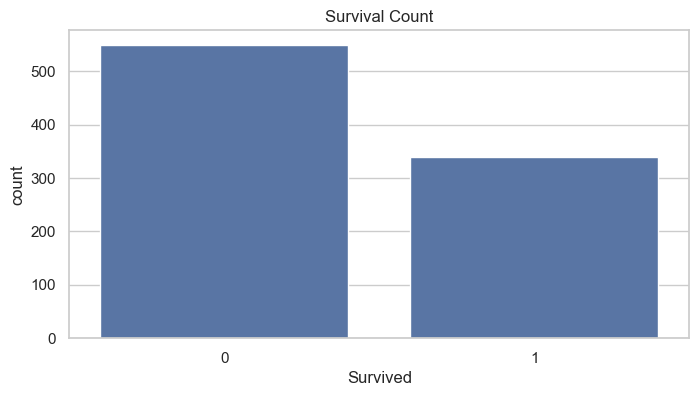

In [73]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

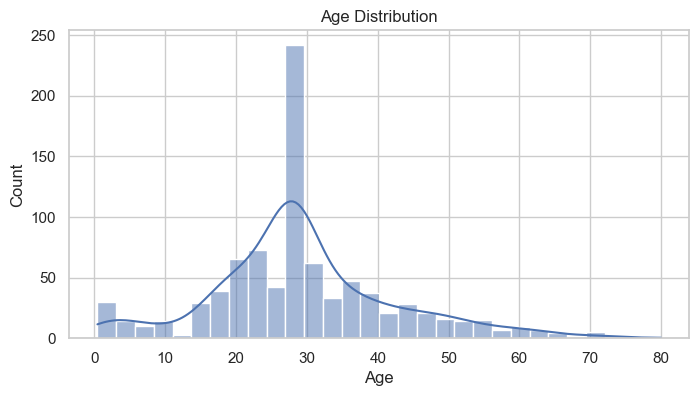

In [74]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

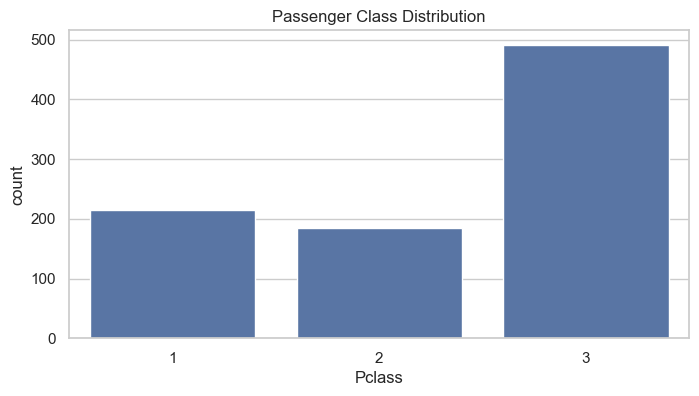

In [75]:
# Passenger class
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

## Bivariate Analysis

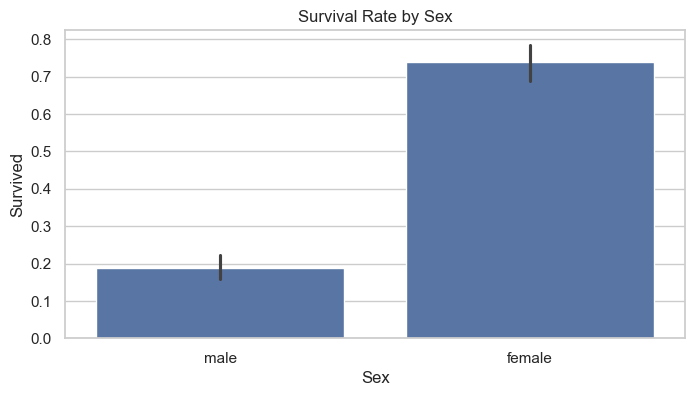

In [76]:
# Survival by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

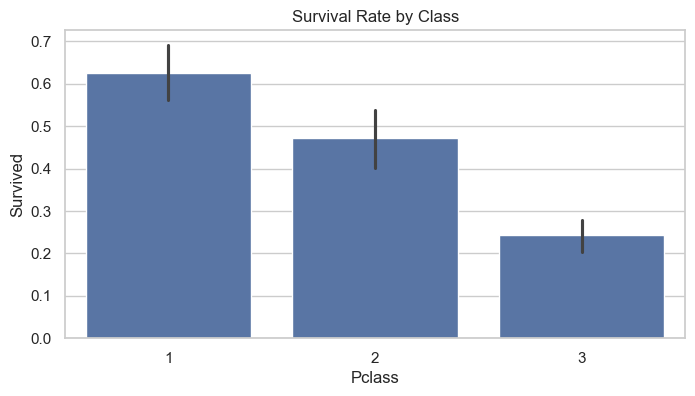

In [77]:
# Survival by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

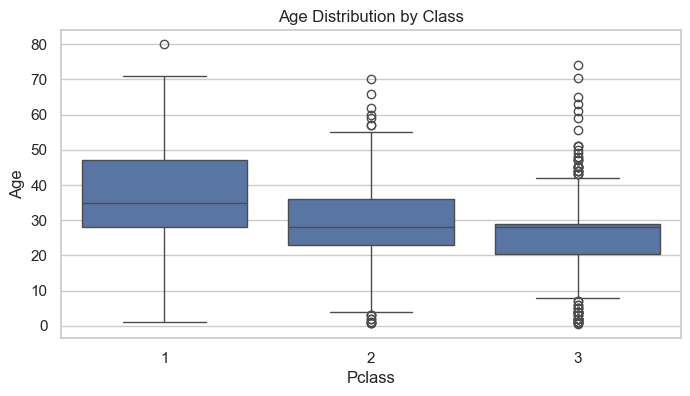

In [78]:
# Age vs class
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Class')
plt.show()

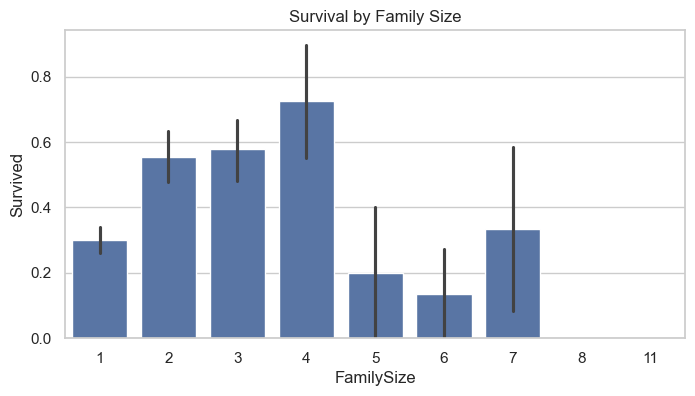

In [81]:
# Family size vs survival
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival by Family Size')
plt.show()

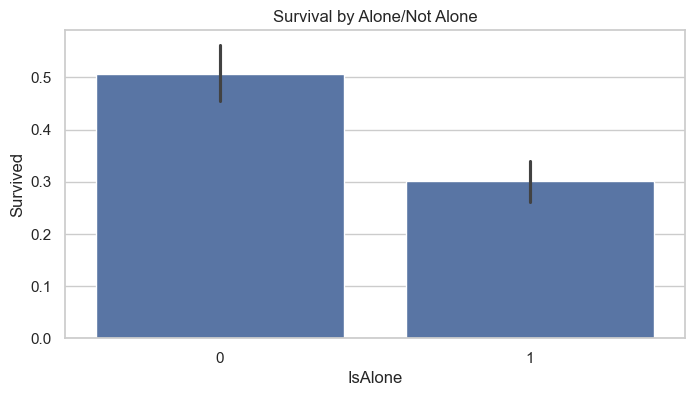

In [82]:
# Alone vs not alone
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival by Alone/Not Alone')
plt.show()

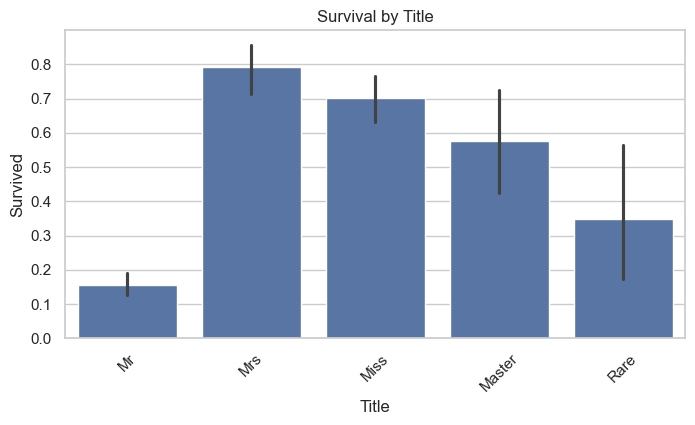

In [83]:
# Title vs survival
sns.barplot(x='Title', y='Survived', data=df)
plt.xticks(rotation=45)
plt.title('Survival by Title')
plt.show()

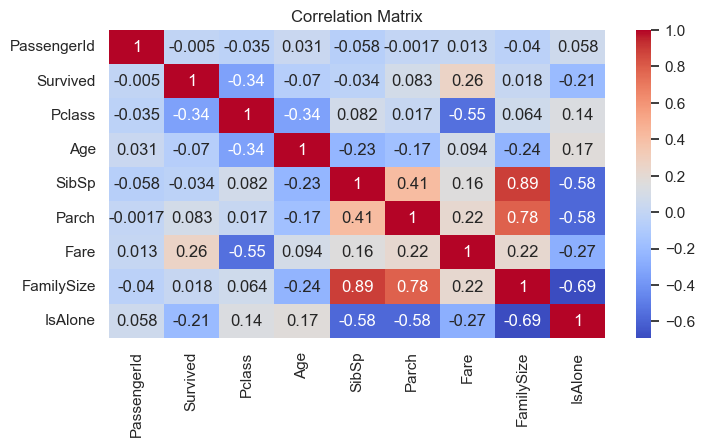

In [84]:
# Correlation heatmap
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

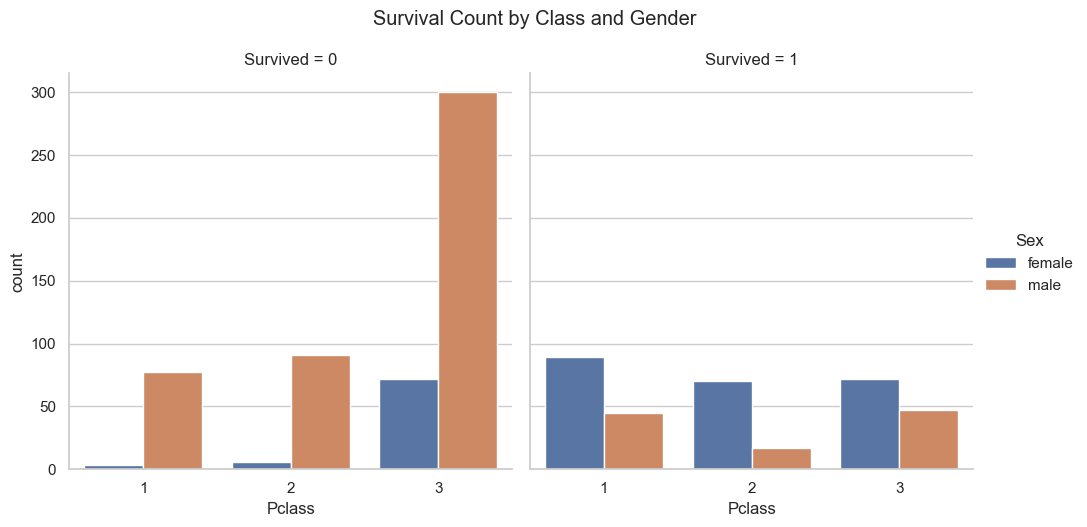

In [86]:
# Survival rate by sex and class
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')
plt.suptitle("Survival Count by Class and Gender", y=1.05)
plt.show()

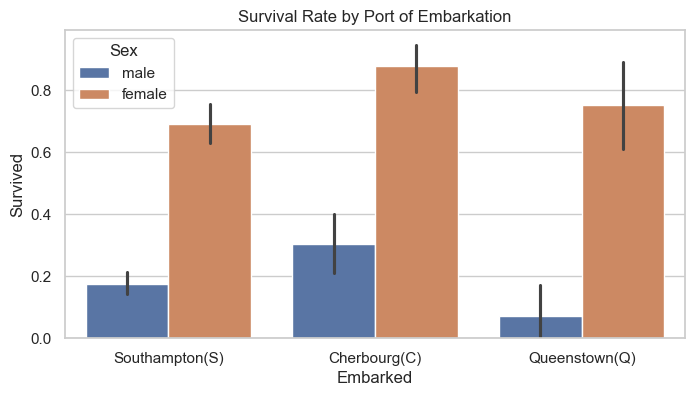

In [ ]:
# Embarked vs survival
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Port of Embarkation')

plt.xticks(['C', 'Q', 'S'], ['Cherbourg(C)', 'Queenstown(Q)', 'Southampton(S)'])
plt.show()
# KDE plot
sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Did not survive')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()


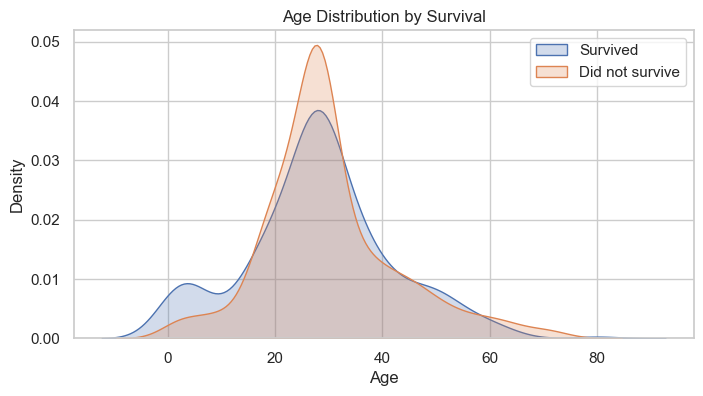

In [95]:
# Age distribution by survival
sns.kdeplot(df[df['Survived'] == 1]['Age'], fill=True, label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'], fill=True, label='Did not survive')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

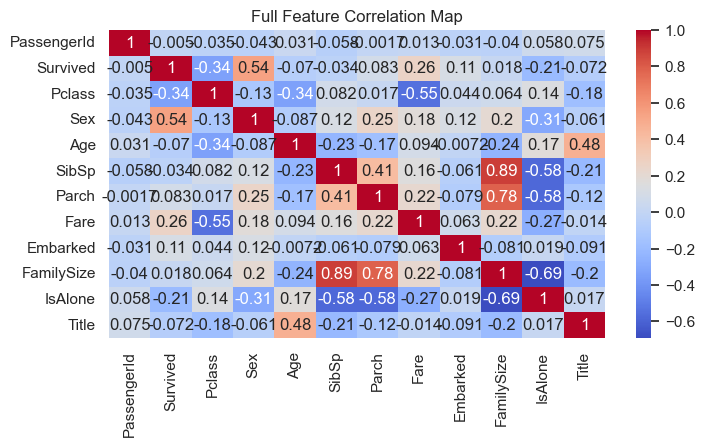

In [98]:
# Encode categorical variables
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_encoded['Title'] = df_encoded['Title'].astype('category').cat.codes

# Only use numeric columns for correlation
corr = df_encoded.select_dtypes(include='number').corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Full Feature Correlation Map")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

t_stat, p_value = ttest_ind(survived, not_survived)
print(f"T-test p-value: {p_value:.4f}")

T-test p-value: 0.0374


## Key Info

- Women had a significantly higher survival rate than men.
- Passengers in 1st class had much better chances of survival.
- Younger passengers were more likely to survive.
- Fare and Pclass are strongly correlated with survival.
- People with family were slightly more likely to survive than those alone.
- Titles like “Miss” and “Mrs” had higher survival than “Mr” or rare titles, which men women survived most.
